In [1]:
using DifferentialEquations
using Plots
using ParameterizedFunctions
using Latexify

f = @ode_def epimodel begin
    dS = B - (μ + ρ) * S + (σ + μ) * (2 * SS + SI + SR)
    dI = -(μ + ρ + δ) * I + (σ + μ) * (2 * II + SI + IR)
    dR = δ * I - (μ + ρ) * R + (σ + μ) * (2 * RR + SR + IR)
    dSS = 0.5 * ρ * S^2 / N - (σ + 2 * μ) * SS
    dSI = ρ * (1 - h) * S * I / N - (σ + ϕ * h + 2 * μ + δ) * SI
    dII = 0.5 * ρ * I^2 / N + ρ * h * S * I / N + ϕ * h * SI - (σ + 2 * μ + δ) * II
    dSR = ρ * S * R / N + δ * SI - (σ + 2 * μ) * SR
    dIR = ρ * I * R / N + δ * II - (σ + 2 * μ + δ) * IR
    dRR = 0.5 * ρ * I^2 / N + δ * IR - (σ + 2 * μ) * RR
    dH = 2 * ρ * h * S * I / N + ρ * (1 - h) * S * I / N
end B μ ρ σ δ h ϕ N

latexify(f)

"\\begin{align}\n\\frac{dS(t)}{dt} =& B + \\left( \\mu + \\sigma \\right) \\left( 2 \\mathrm{SS}\\left( t \\right) + \\mathrm{SI}\\left( t \\right) + \\mathrm{SR}\\left( t \\right) \\right) - \\left( \\mu + \\rho \\right) S\\left( t \\right) \\\\\n\\frac{dI(t)}{dt} =& \\left( \\mu + \\sigma \\right) \\l" ⋯ 1369 bytes ⋯ "\\left( I\\left( t \\right) \\right)^{2} \\rho}{N} - \\left( \\sigma + 2 \\mu \\right) \\mathrm{RR}\\left( t \\right) \\\\\n\\frac{dH(t)}{dt} =& \\frac{\\rho \\left( 1 - h \\right) I\\left( t \\right) S\\left( t \\right)}{N} + \\frac{2 h \\rho I\\left( t \\right) S\\left( t \\right)}{N}\n\\end{align}\n"

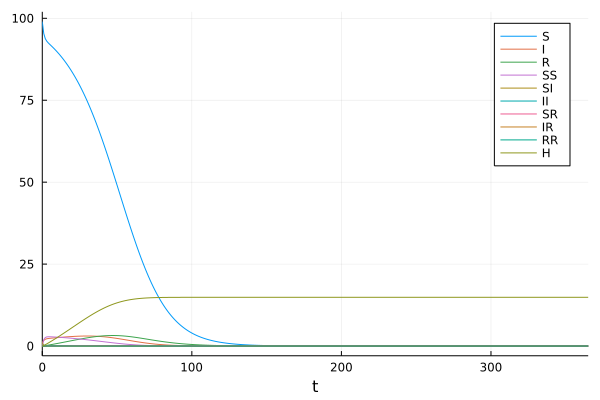

In [25]:
using DifferentialEquations
using Plots
using ParameterizedFunctions
using Latexify
f = @ode_def epimodel begin
    dS = B - (μ + ρ) * S + (σ + μ) * (2 * SS + SI + SR)
    dI = -(μ + ρ + δ) * I + (σ + μ) * (2 * II + SI + IR)
    dR = δ * I - (μ + ρ) * R + (σ + μ) * (2 * RR + SR + IR)
    dSS = 0.5 * ρ * S^2 / N - (σ + 2 * μ) * SS
    dSI = ρ * (1 - h) * S * I / N - (σ + ϕ * h + 2 * μ + δ) * SI
    dII = 0.5 * ρ * I^2 / N + ρ * h * S * I / N + ϕ * h * SI - (σ + 2 * μ + δ) * II
    dSR = ρ * S * R / N + δ * SI - (σ + 2 * μ) * SR
    dIR = ρ * I * R / N + δ * II - (σ + 2 * μ + δ) * IR
    dRR = 0.5 * ρ * I^2 / N + δ * IR - (σ + 2 * μ) * RR
    dH = 2 * ρ * h * S * I / N + ρ * (1 - h) * S * I / N
end B μ ρ σ δ h ϕ N

N = 100
u0 = [N - 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
tmax = 365
tspan = (0, tmax)
B = 0
μ = 0
ρ = 1 / 15
σ = 1
δ = 1 / 30
h = 0.9
ϕ = 1
p0 = [B, μ, ρ, σ, δ, h, ϕ, N]
odeprob = ODEProblem(f, u0, tspan, p0)
sol = solve(odeprob, Vern7(), saveat=0:1:tmax)
plot(sol)

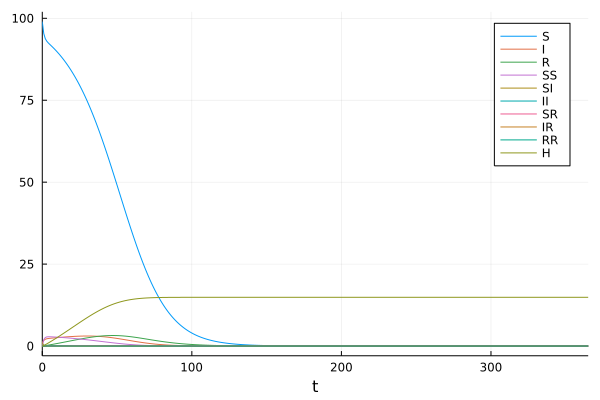

In [38]:
using DifferentialEquations
using Plots
using ParameterizedFunctions
using Latexify
f = @ode_def epimodel begin
    dS = B - (μ + ρ) * S + (σ + μ) * (2 * SS + SI + SR)
    dI = -(μ + ρ + δ) * I + (σ + μ) * (2 * II + SI + IR)
    dR = δ * I - (μ + ρ) * R + (σ + μ) * (2 * RR + SR + IR)
    dSS = 0.5 * ρ * S^2 / N - (σ + 2 * μ) * SS
    dSI = ρ * (1 - h) * S * I / N - (σ + ϕ * h + 2 * μ + δ) * SI
    dII = 0.5 * ρ * I^2 / N + ρ * h * S * I / N + ϕ * h * SI - (σ + 2 * μ + δ) * II
    dSR = ρ * S * R / N + δ * SI - (σ + 2 * μ) * SR
    dIR = ρ * I * R / N + δ * II - (σ + 2 * μ + δ) * IR
    dRR = 0.5 * ρ * I^2 / N + δ * IR - (σ + 2 * μ) * RR
    dH = 2 * ρ * h * S * I / N + ρ * (1 - h) * S * I / N
end B μ ρ σ δ h ϕ N

function epimodel(du, u, p, t)
    B, μ, ρ, σ, δ, h, ϕ, N= p
    S, I, R, SS, SI, II, SR, IR, RR, H = u
    du[1] = B - (μ + ρ) * S + (σ + μ) * (2 * SS + SI + SR)
    du[2] = -(μ + ρ + δ) * I + (σ + μ) * (2 * II + SI + IR)
    du[3] = δ * I - (μ + ρ) * R + (σ + μ) * (2 * RR + SR + IR)
    du[4] = 0.5 * ρ * S^2 / N - (σ + 2 * μ) * SS
    du[5] = ρ * (1 - h) * S * I / N - (σ + ϕ * h + 2 * μ + δ) * SI
    du[6] = 0.5 * ρ * I^2 / N + ρ * h * S * I / N + ϕ * h * SI - (σ + 2 * μ + δ) * II
    du[7] = ρ * S * R / N + δ * SI - (σ + 2 * μ) * SR
    du[8] = ρ * I * R / N + δ * II - (σ + 2 * μ + δ) * IR
    du[9] = 0.5 * ρ * I^2 / N + δ * IR - (σ + 2 * μ) * RR
    du[10] = 2 * ρ * h * S * I / N + ρ * (1 - h) * S * I / N
end

N = 100
u0 = [N - 1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
tmax = 365
tspan = (0, tmax)
B = 0
μ = 0
ρ = 1 / 15
σ = 1
δ = 1 / 30
h = 0.9
ϕ = 1
p0 = [B, μ, ρ, σ, δ, h, ϕ, N]
odeprob1 = ODEProblem(f, u0, tspan, p0)
odeprob2 = ODEProblem(epimodel, u0, tspan, p0)
sol1 = solve(odeprob1, Vern7(), saveat=0:1:tmax)
plot(sol1)

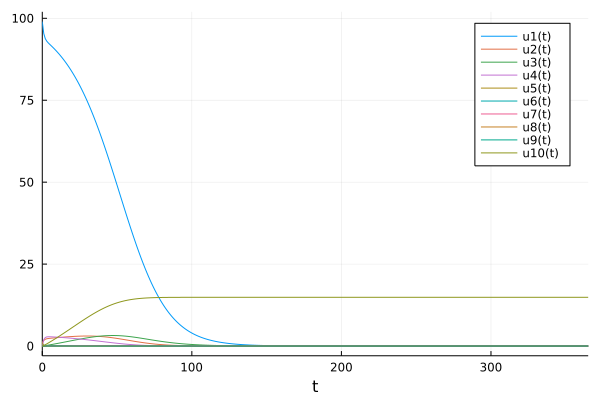

In [39]:
#AutoVern7(Rodas5())
sol2 = solve(odeprob2,alg=AutoVern7(Rodas5()),reltol=1e-12,abstol=1e-12, saveat=0:1:tmax)
plot(sol2)